In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

In [ ]:
df = pd.read_csv('drive/MyDrive/1001 Project/data/user brand data/validation.csv')
df.head()


,brand,user_id,purchase_count,brand_id
0,airnails,10280338,1,0
1,airnails,28129653,1,0
2,airnails,126051562,2,0
3,airnails,150318419,1,0
4,airnails,170386254,4,0


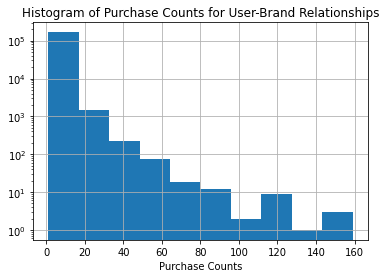

In [ ]:
fig,ax = plt.subplots()
df['purchase_count'].hist()
ax.set_yscale('log')
plt.title('Histogram of Purchase Counts for User-Brand Relationships')
plt.xlabel('Purchase Counts')
plt.show()

In [5]:
df = pd.read_csv('drive/MyDrive/1001 Project/data/user product data/validation.csv')
df.head()

,product_id,user_id,purchase_count
0,3762,254751820,1
1,3762,276278184,1
2,3762,302394953,1
3,3762,356551665,1
4,3762,445330308,1


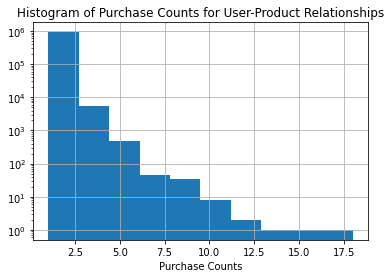

In [ ]:
fig,ax = plt.subplots()
df['purchase_count'].hist()
ax.set_yscale('log')
plt.title('Histogram of Purchase Counts for User-Product Relationships')
plt.xlabel('Purchase Counts')
plt.show()

In [12]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdays = ['Sun'] + weekdays[:-1]

def get_weekday_cnts(month):
  if month == 'October':
    return [4, 4, 5, 5, 5, 4, 4]
  elif month == 'November':
    return [4, 4, 4, 4, 4, 5, 5]
  elif month == 'December':
    return [5, 5, 5, 4, 4, 4, 4]
  elif month == 'January':
    return [4, 4, 4, 5, 5, 5, 4]
  elif month == 'February':
    return [4, 4, 4, 4, 4, 4, 5]
  elif month == 'All 5 Months':
    return [21, 21, 22, 22, 22, 22, 22]

def plot_weekdays_purchases(df, month, weekdays):
  df = df[(df.price > 0) & (df.event_type == 'purchase')]
  df.loc[:, ['event_time']] = pd.to_datetime(df['event_time'],\
                                    infer_datetime_format = True)
  sell = df.loc[:, ['event_time', 'event_type']]
  sell.loc[:, ['event_weekday']] = sell['event_time'].dt.weekday
  sell = sell.loc[:, ['event_type', 'event_weekday']].groupby(['event_weekday']).size().reset_index(name = 'cnt')
  weekdays_id = sell['event_weekday'].to_list()
  purchase_cnt = sell['cnt'].to_list()
  sun = purchase_cnt[-1]

  purchase_cnt = [sun] + purchase_cnt[:-1]
  weekday_cnts = get_weekday_cnts(month)
  purchase_cnt = np.divide(purchase_cnt, weekday_cnts)
  plt.bar(weekdays_id, purchase_cnt)
  plt.ylabel('Total Purchase Counts')
  plt.xlabel('Weekdays')
  plt.title('Averaged Purchases for each Weekdays in ' + month)
  plt.xticks(weekdays_id, weekdays)
  plt.gca().set_ylim(bottom = 5000)
  plt.show()


In [10]:
df10 = pd.read_csv('drive/MyDrive/2019-Oct-clean.csv')
df11 = pd.read_csv('drive/MyDrive/2019-Nov-clean.csv')
df12 = pd.read_csv('drive/MyDrive/2019-Dec-clean.csv')
df1 = pd.read_csv('drive/MyDrive/2020-Jan-clean.csv')
df2 = pd.read_csv('drive/MyDrive/2020-Feb-clean.csv')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


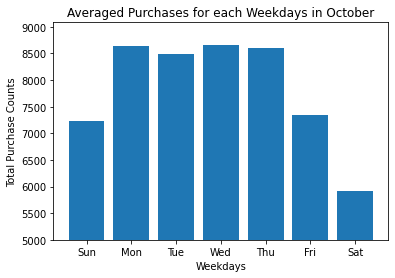

In [13]:
plot_weekdays_purchases(df10, 'October', weekdays)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


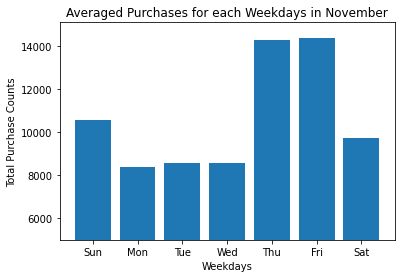

In [14]:
plot_weekdays_purchases(df11, 'November', weekdays)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


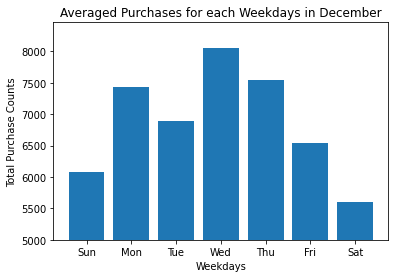

In [15]:
plot_weekdays_purchases(df12, 'December', weekdays)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


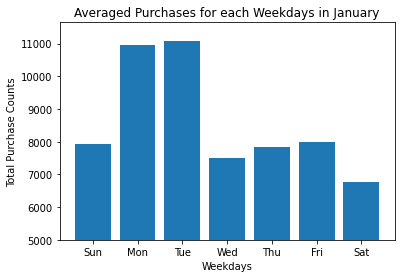

In [16]:
plot_weekdays_purchases(df1, 'January', weekdays)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


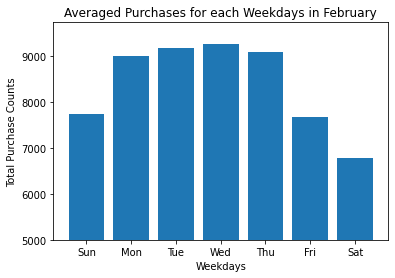

In [17]:
plot_weekdays_purchases(df2, 'February', weekdays)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


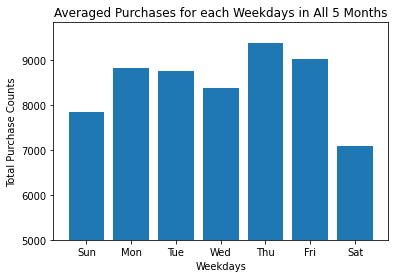

In [18]:
plot_weekdays_purchases(pd.concat([df10, df11, df12, df1, df2]), 'All 5 Months', weekdays)

In [ ]:
def plot_purchasing_trend(df, month):
  df = df[df.price > 0]
  df['event_time'] = pd.to_datetime(df['event_time'],\
                                    infer_datetime_format = True)
  time_df = df.loc[:, ['event_time', 'event_type']]
  time_df = time_df[time_df['event_type'] == 'purchase']
  time_df['event_time'] = time_df['event_time'].dt.date
  sell = time_df.groupby('event_time').size().reset_index(name = 'cnt')
  plt.figure(figsize = (50, 30))
  plt.xticks(rotation = 50, fontsize = 10)
  plt.yticks(fontsize = 20)
  sns.set(color_codes = True)
  pal = sns.color_palette("Blues_r", sell.shape[0])
  rank = sell['cnt'].argsort().argsort()
  f = sns.barplot(data = sell, x = 'event_time', y = 'cnt',\
                  palette = np.array(pal[::-1])[rank])
  
  plt.title('Purchasing Counts Trend of ' + month)
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


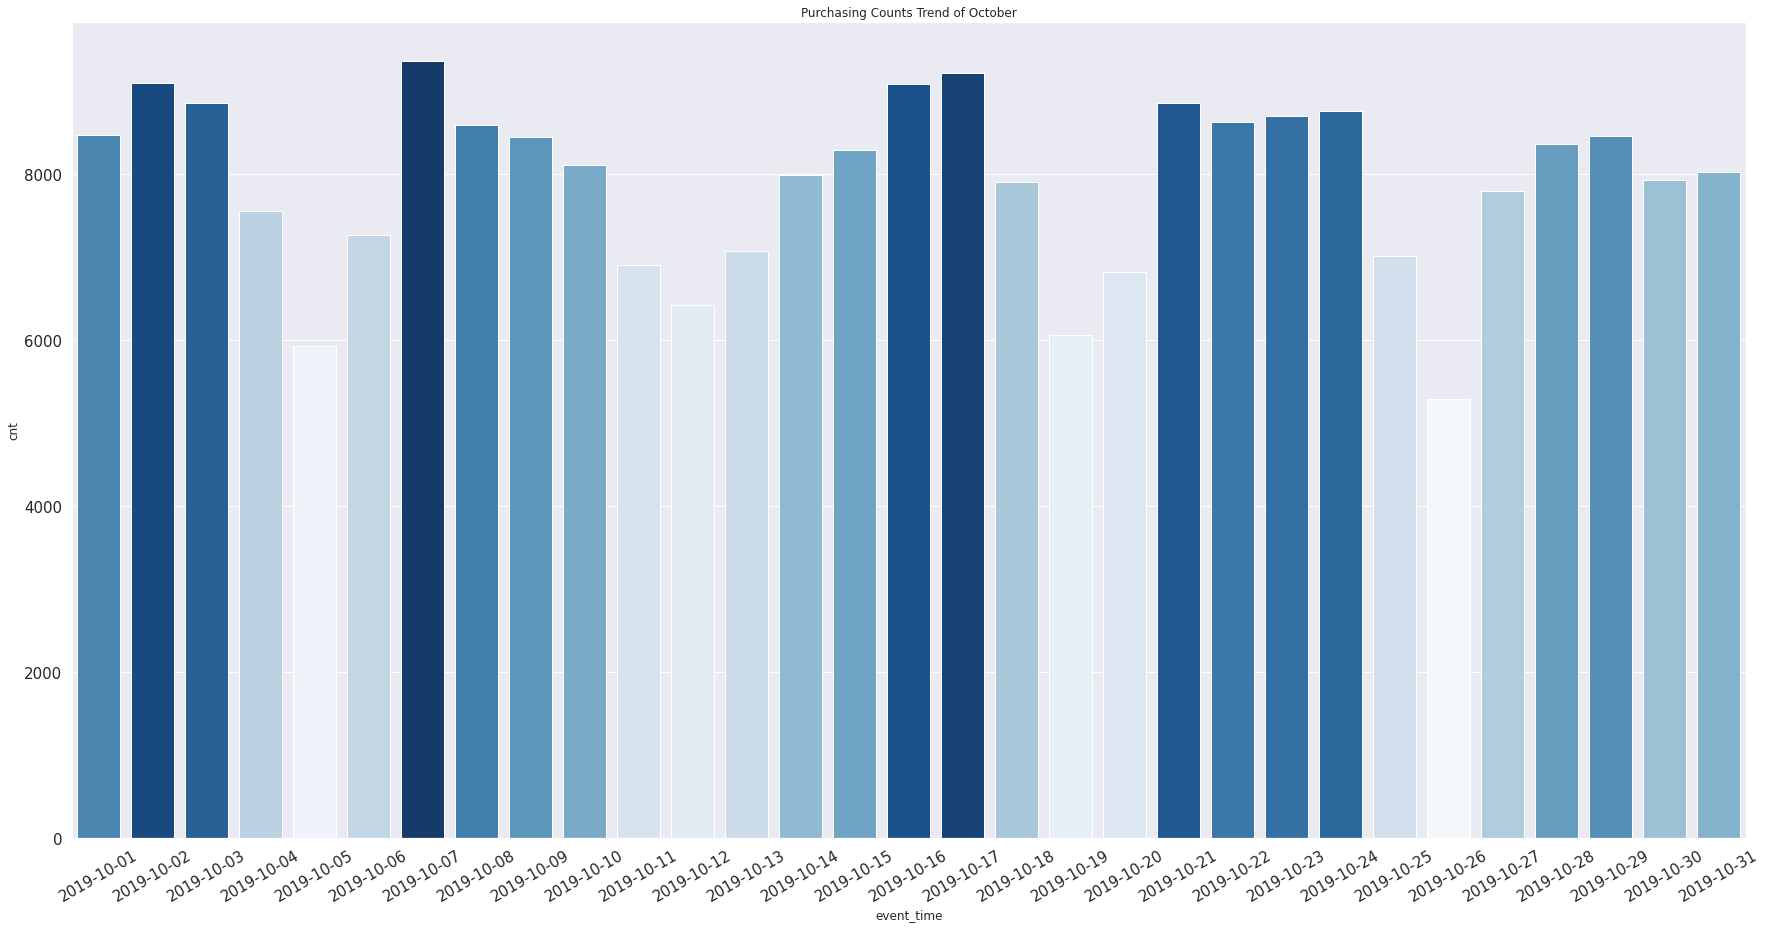

In [ ]:
plot_purchasing_trend(df10, 'October')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


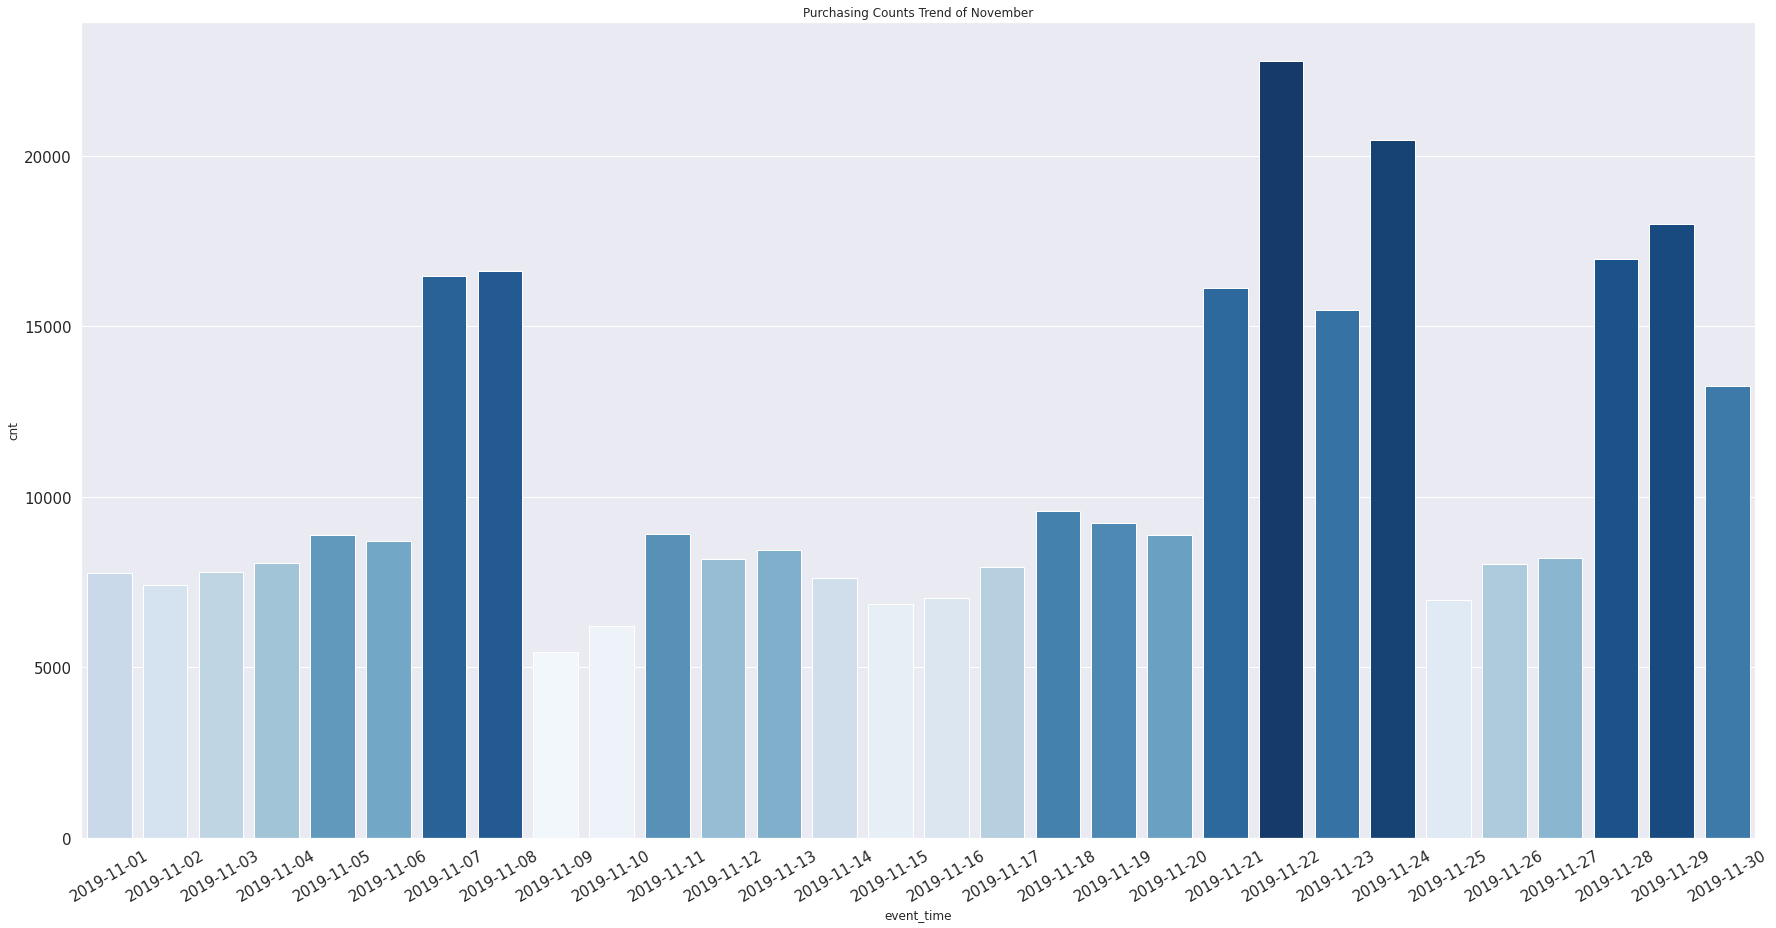

In [ ]:
plot_purchasing_trend(df11, 'November')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


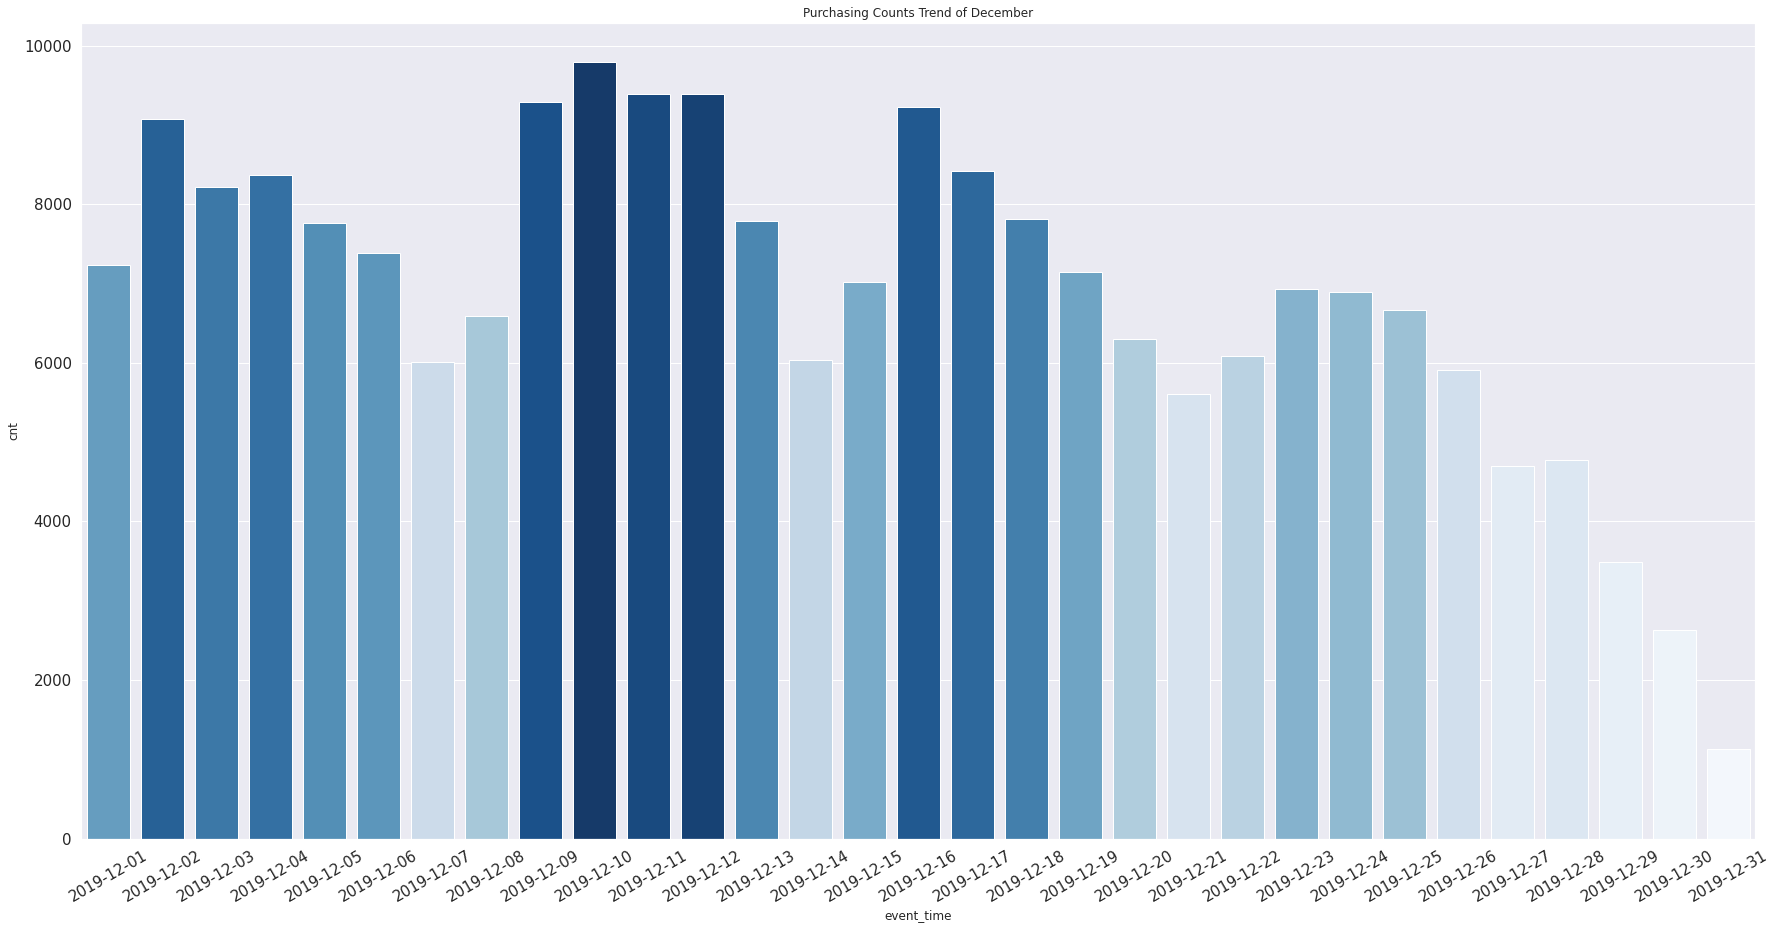

In [ ]:
plot_purchasing_trend(df12, 'December')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


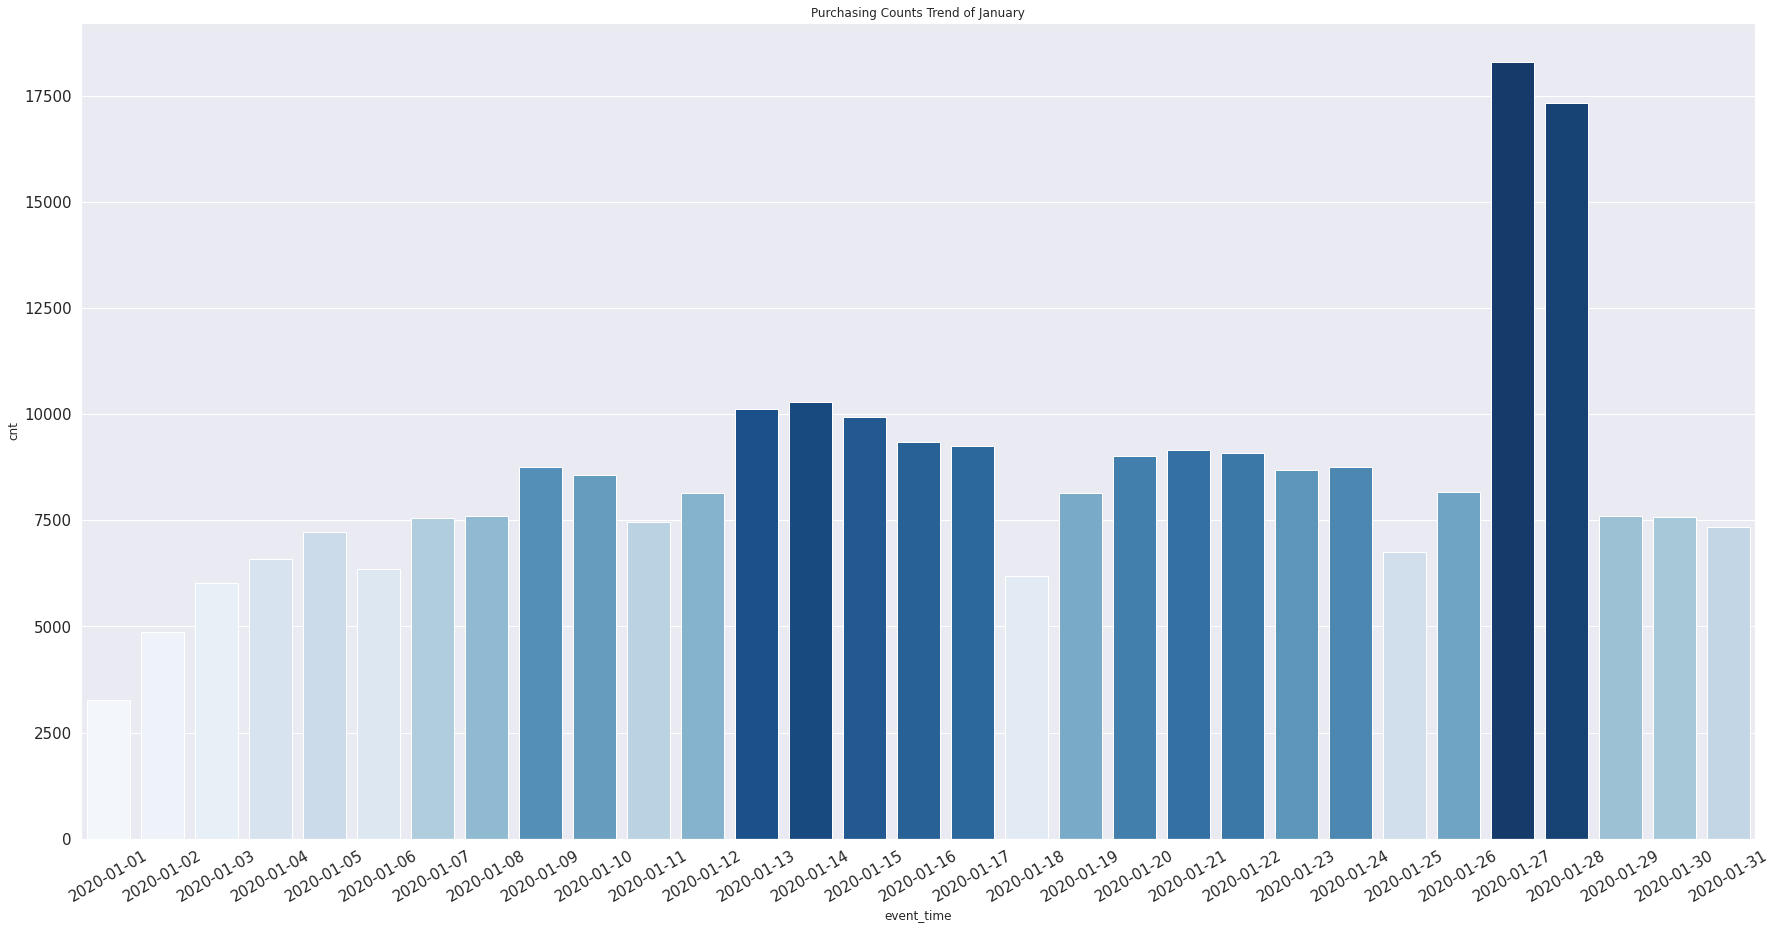

In [ ]:
plot_purchasing_trend(df1, 'January')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


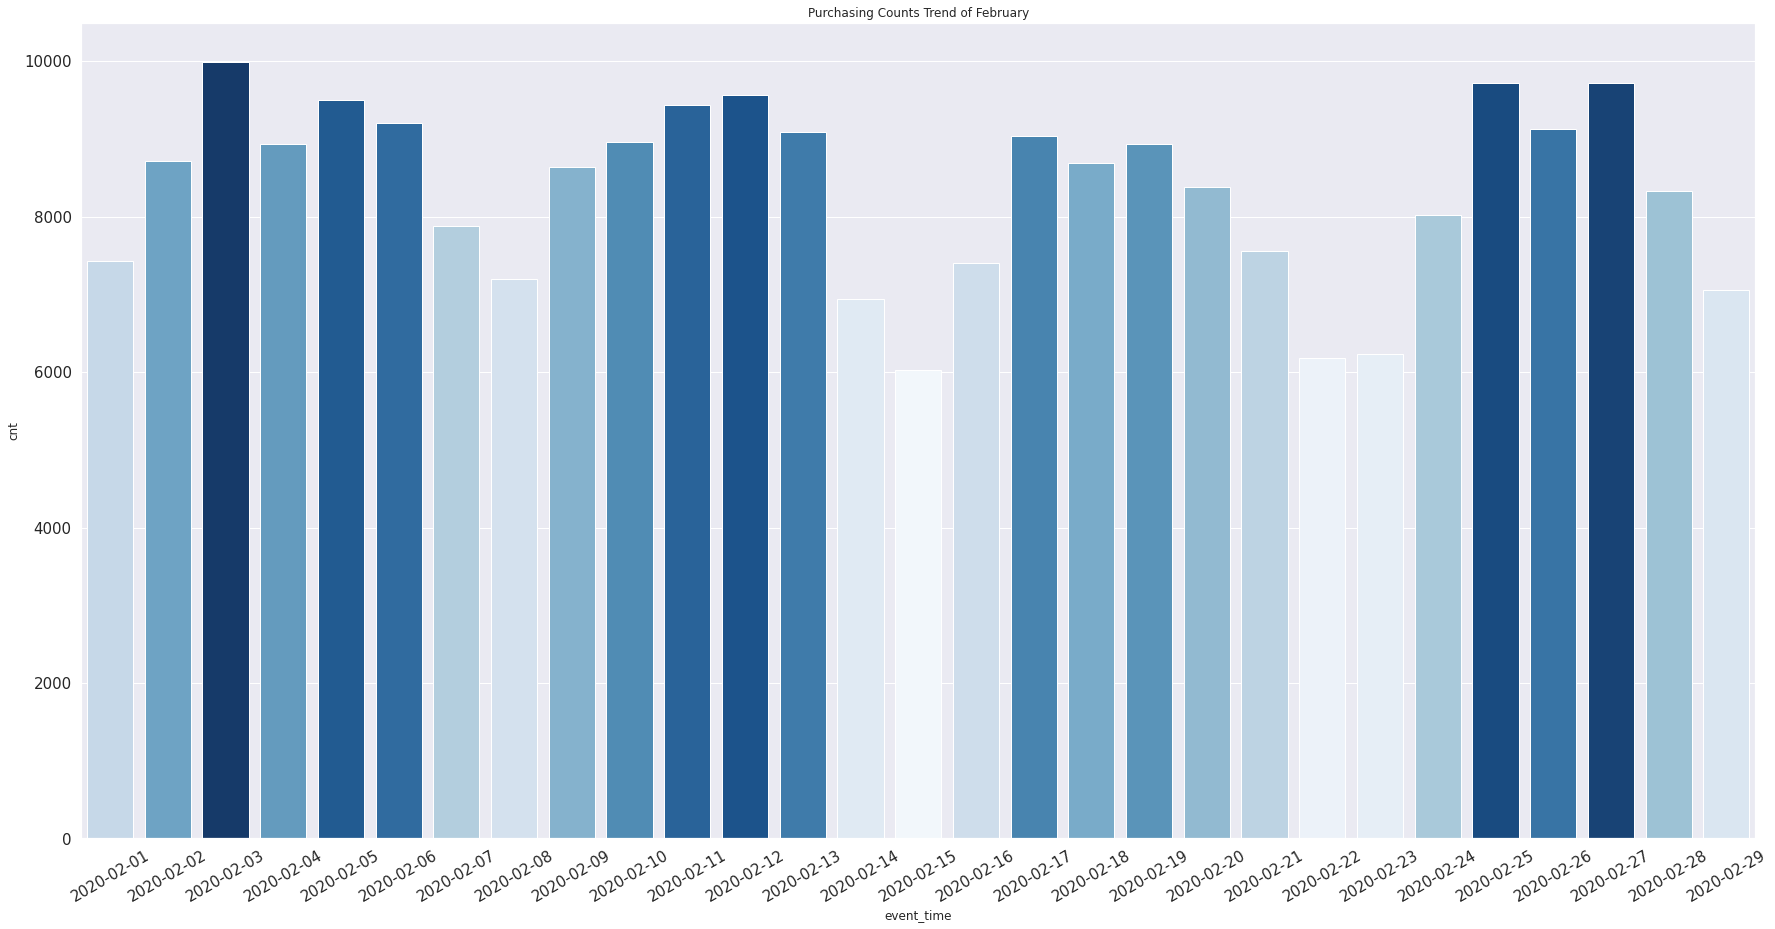

In [ ]:
plot_purchasing_trend(df2, 'February')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


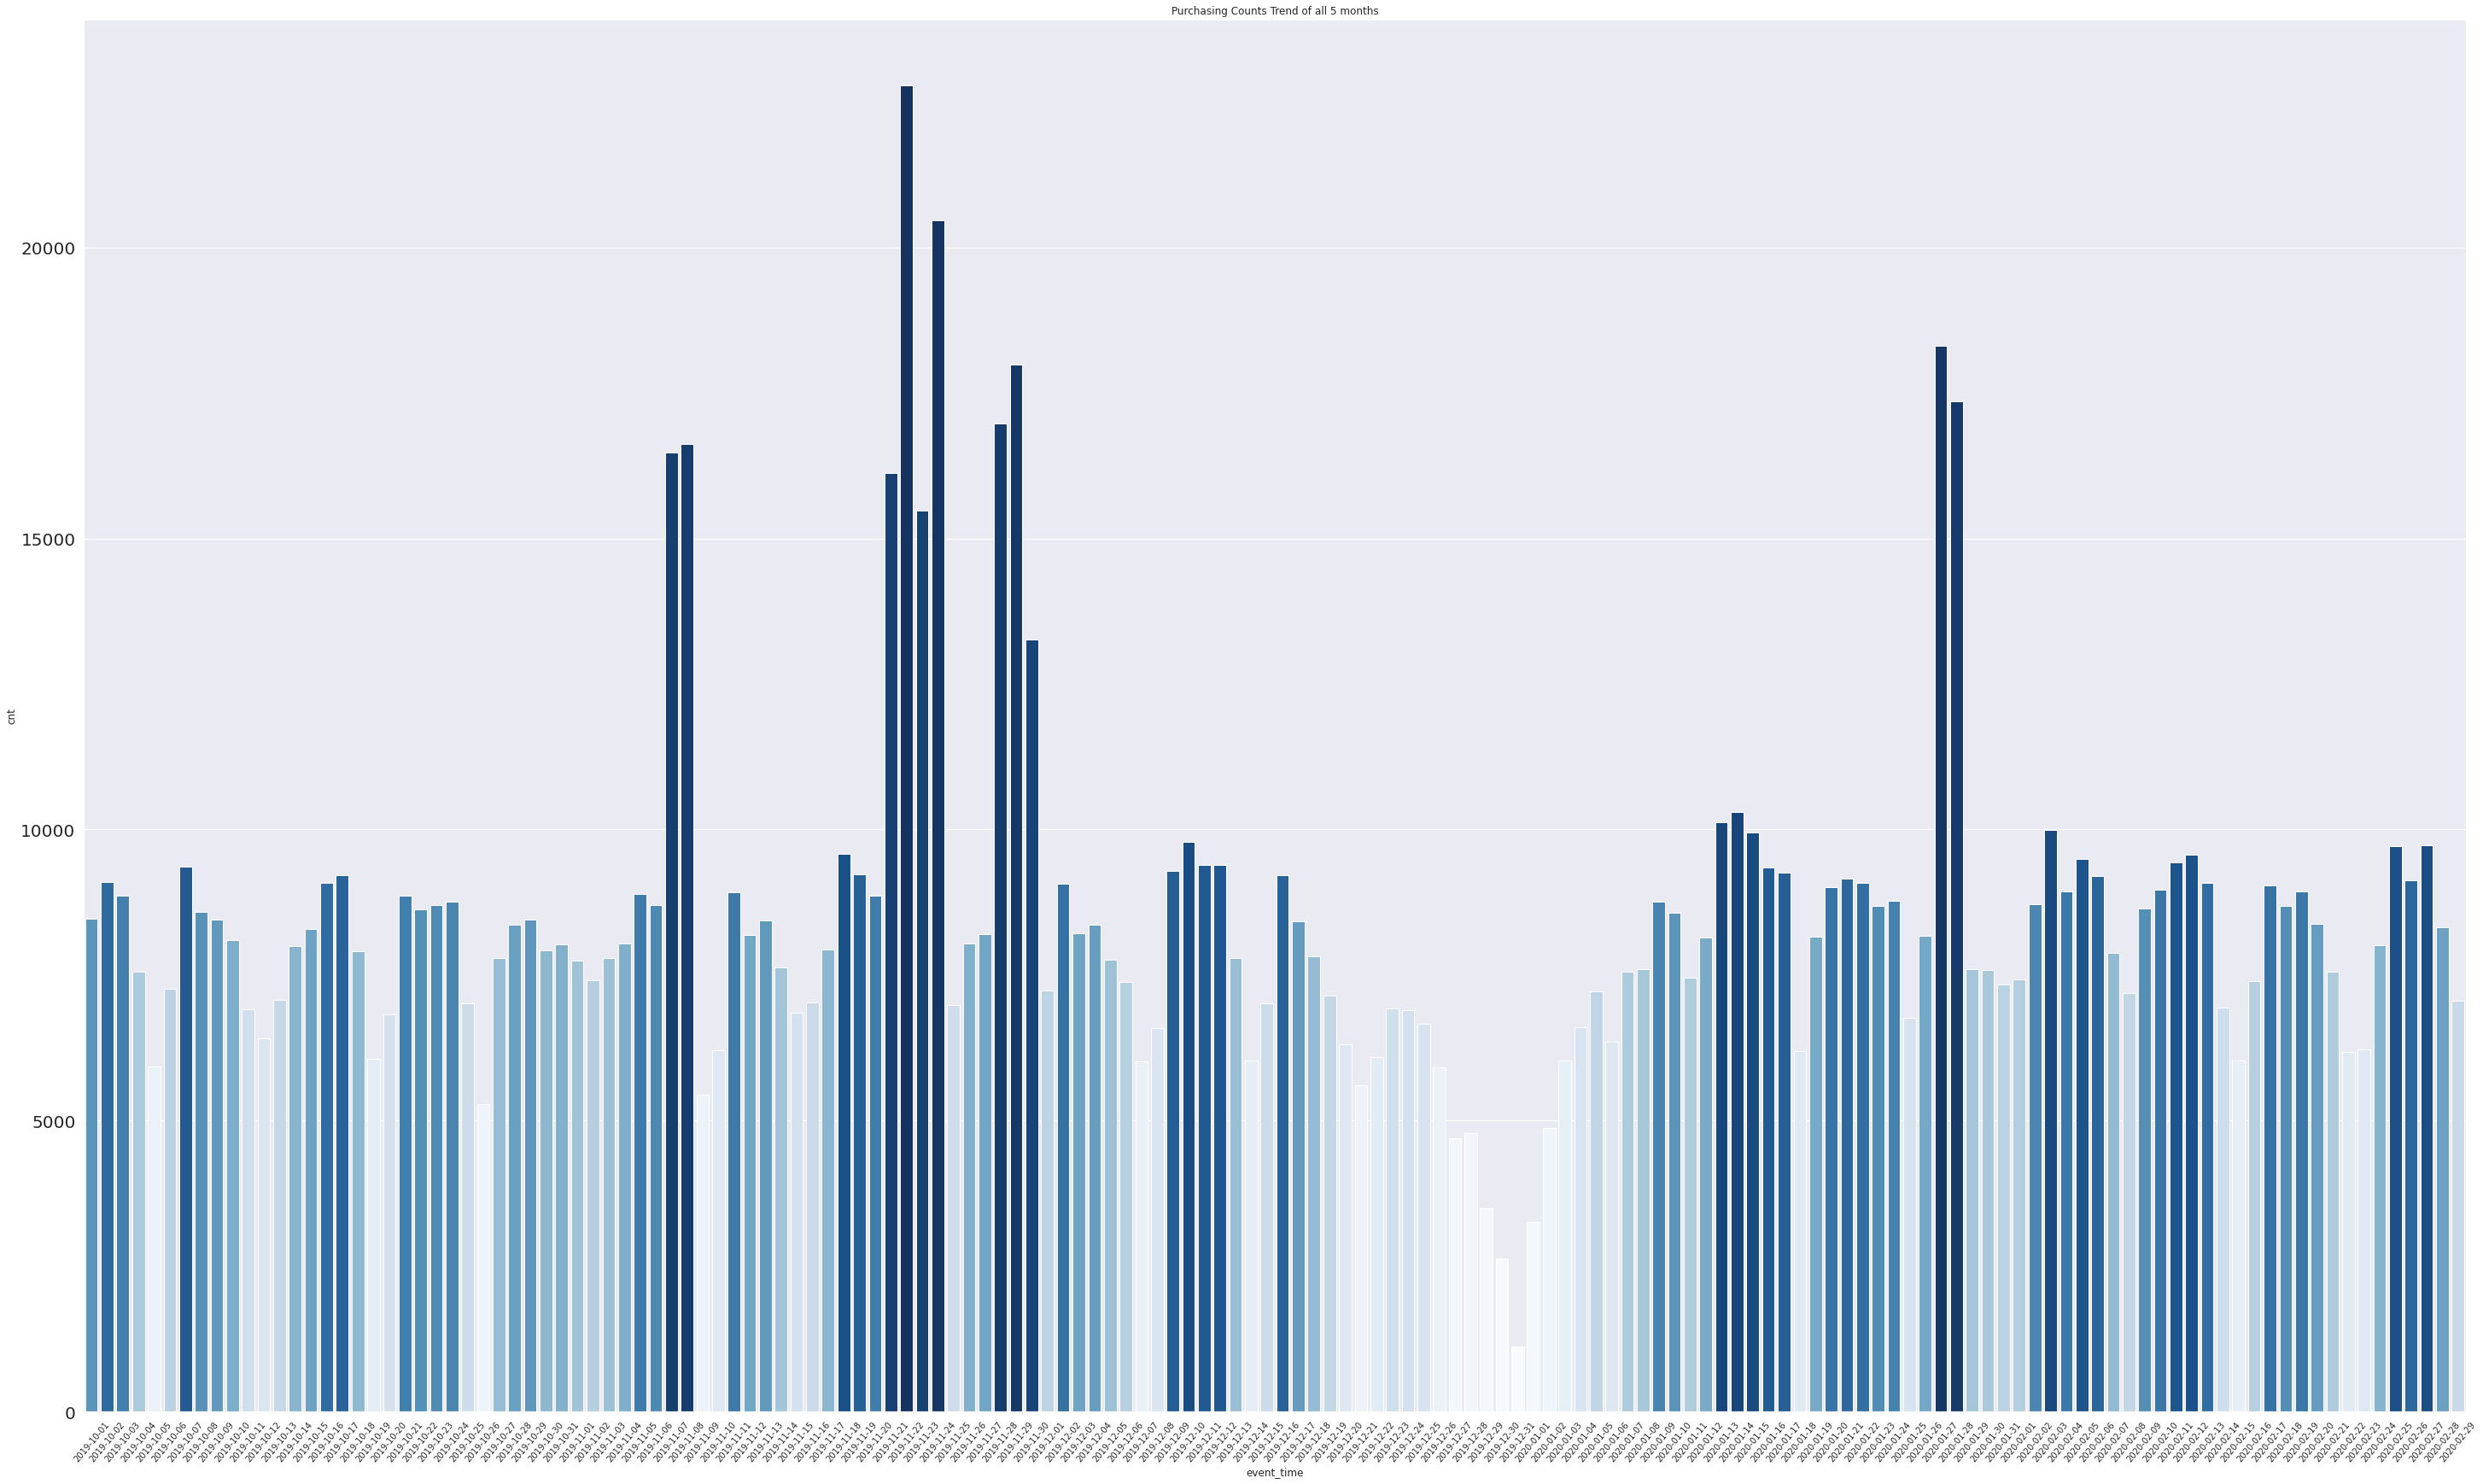

In [ ]:
plot_purchasing_trend(pd.concat([df10, df11, df12, df1, df2]), 'all 5 months')

In [ ]:
def plot_hours_purchasing_counts(df, month):
  df = df.loc[:, ['event_time', 'event_type', 'price']]
  df = df[df.price > 0]
  df['event_time'] = pd.to_datetime(df['event_time'],\
                                    infer_datetime_format = True)
  
  plt.figure()
  for event, group in df.loc[:, ['event_time', 'event_type']].groupby(['event_type']):
    group['hour'] = group['event_time'].dt.hour
    group = group.groupby('hour').size().reset_index(name = 'cnt')
    norm = group['cnt'].sum()
    event_hours = np.divide(group['cnt'].values, norm)
    event_hours = np.multiply(event_hours, 100)
    plt.plot(group['hour'], event_hours, label = event)
  
  plt.legend()
  plt.title('Percentage of Events over 24 Hours of a Day for ' + month)
  plt.xlabel('Hours')
  plt.ylabel('Percentage of Events')
  plt.show()


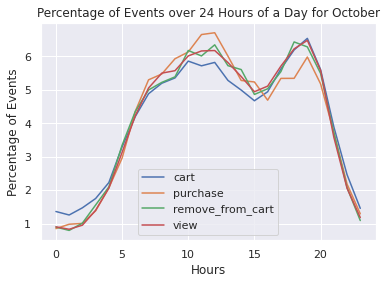

In [ ]:
plot_hours_purchasing_counts(df10, 'October')

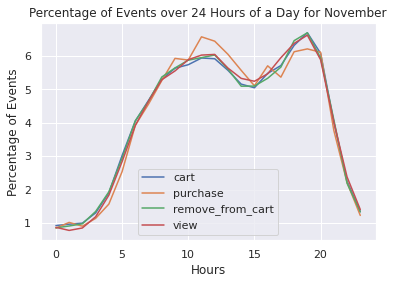

In [ ]:
plot_hours_purchasing_counts(df11, 'November')

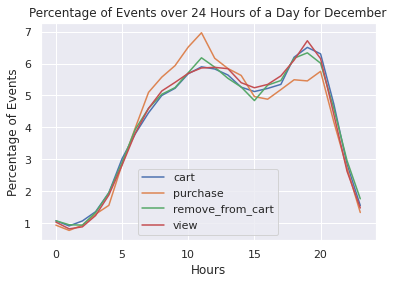

In [ ]:
plot_hours_purchasing_counts(df12, 'December')

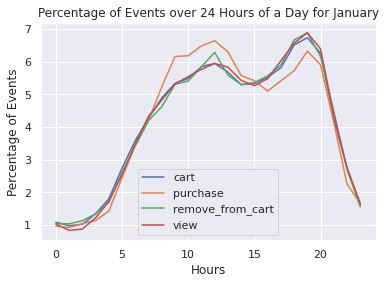

In [ ]:
plot_hours_purchasing_counts(df1, 'January')

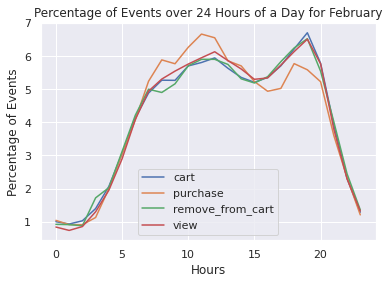

In [ ]:
plot_hours_purchasing_counts(df2, 'February')

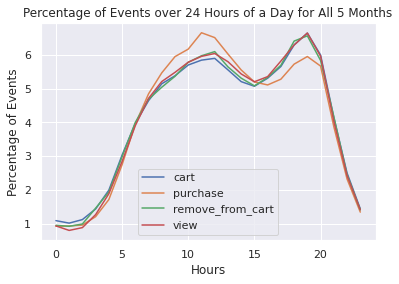

In [ ]:
plot_hours_purchasing_counts(pd.concat([df10, df11, df12, df1, df2]), 'All 5 Months')

In [19]:
df = pd.read_csv('drive/MyDrive/all-5-months-clean.csv')
df = df.drop(columns=['category_code','brand','product_id','category_id','user_session'])
df['event_time'] = pd.to_datetime(df['event_time'], infer_datetime_format = True)
df = df.iloc[:, 1:]
df['month'] = df['event_time'].dt.month
r_map = {10: 4, 11: 3, 12: 2, 1: 1, 2: 0} # keys are the numeric values for months
df['Recency'] = [r_map[m] for m in df['month']]
df_F = df.groupby('user_id')['event_type'].count().reset_index().rename(columns = {"event_type": "Frequency"})
df_M = df.groupby('user_id')['price'].sum().reset_index().rename(columns = {"price": "Monetary"})
df_R = df.groupby('user_id')['Recency'].min().reset_index().rename(columns = {'0': 'Recency'})
df_FM = pd.merge(df_F, df_M, on = 'user_id')
df_FMR = pd.merge(df_FM, df_R, on = 'user_id')
df_FMR.head()

,user_id,Frequency,Monetary,Recency
0,465496,3,30.00,1
1,1120748,1,4.05,3
2,1180452,1,25.40,2
3,1458813,29,159.36,3
4,2038666,1,25.38,0


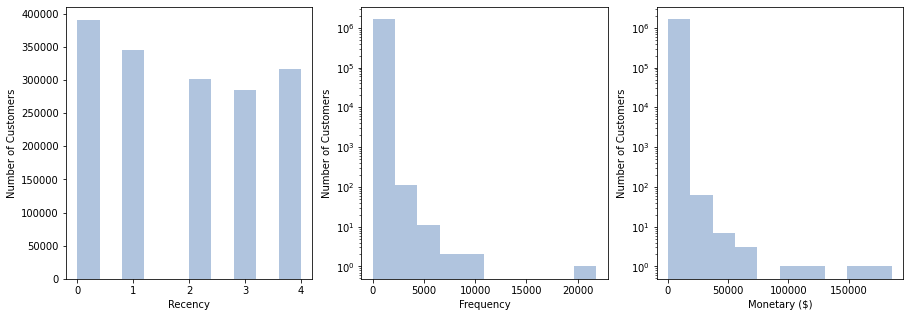

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

ax[0].hist(df_FMR['Recency'], color = 'lightsteelblue')
ax[0].set_xlabel('Recency')
ax[0].set_ylabel('Number of Customers')

ax[1].hist(df_FMR['Frequency'], color = 'lightsteelblue')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Number of Customers')
ax[1].set_yscale('log')

ax[2].hist(df_FMR['Monetary'], color='lightsteelblue')
ax[2].set_xlabel('Monetary ($)')
ax[2].set_ylabel('Number of Customers')
ax[2].set_yscale('log')

plt.show()

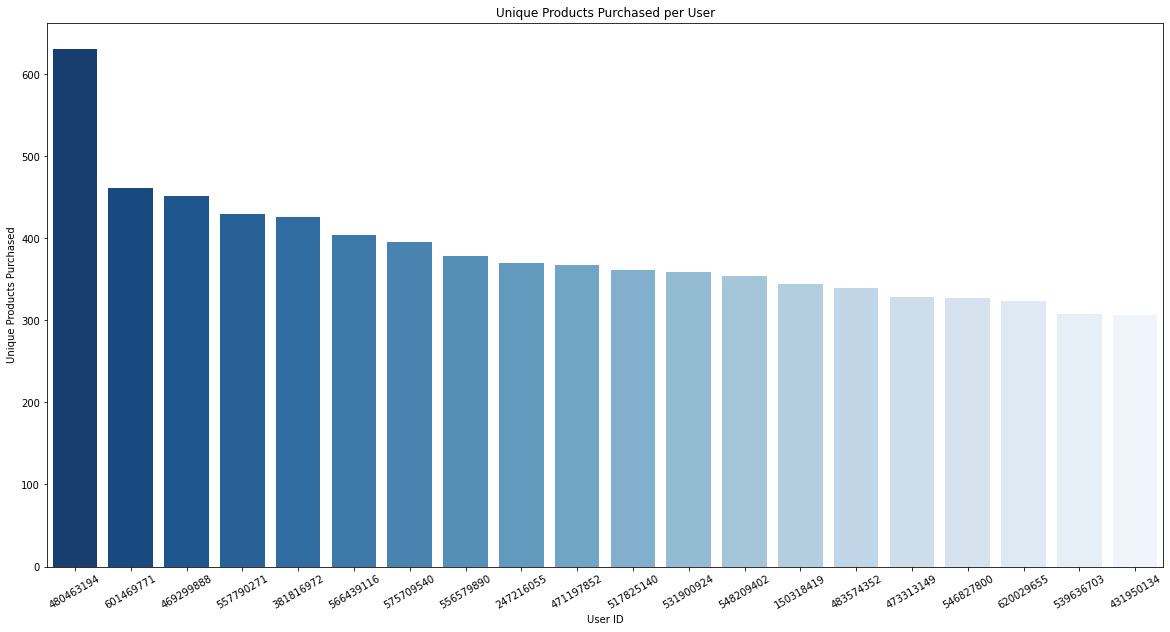

In [ ]:
df = pd.read_csv('drive/MyDrive/all-5-months-clean.csv')
purchased = df.loc[:, ['product_id', 'user_id']]
purchased = purchased.drop_duplicates()
purchased = purchased.groupby(['user_id']).count()
purchased = purchased.reset_index()
purchased.columns = ['user_id', 'products']
purchased = purchased.sort_values(by = ['products'], ascending = False)
purchased = purchased.iloc[:20, :]

plt.figure(figsize = (20, 10))
sns.barplot(x = 'user_id', y = 'products', data = purchased,\
            order = purchased.sort_values('products', ascending=False).user_id,\
            palette = 'Blues_r')
plt.xticks(rotation = 30)
plt.xlabel('User ID')
plt.ylabel('Unique Products Purchased')
plt.title('Unique Products Purchased per User')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


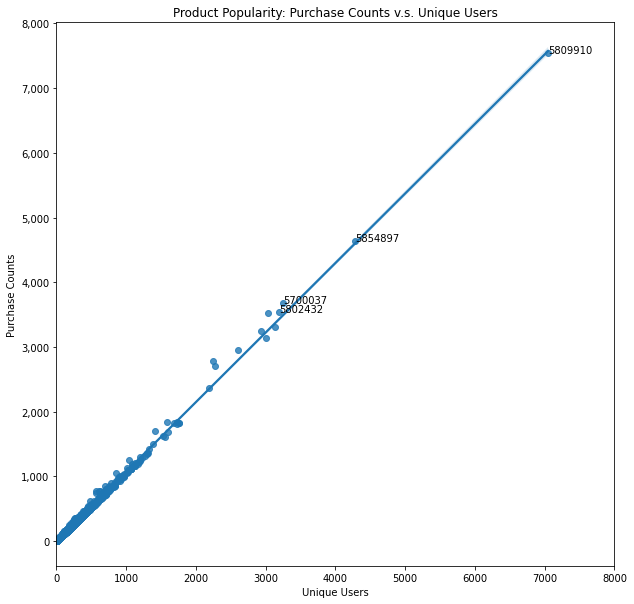

In [ ]:
df = pd.read_csv('drive/MyDrive/all-5-months-clean.csv')
uniq_users = df.loc[:, ['product_id', 'user_id']].groupby(['product_id']).count()
uniq_users = uniq_users.reset_index()
uniq_users.columns = ['product_id', 'user_cnt']
pop = df.groupby(['product_id', 'user_id']).sum()
pop = pop.reset_index()
pop = pop.loc[:, ['product_id', 'cnt']].groupby(['product_id']).sum()
pop = pop.reset_index()
pop.columns = ['product_id', 'purchase_cnt']
merged = pd.merge(uniq_users, pop, on = 'product_id')
merged = merged.sort_values(by = 'purchase_cnt', ascending = False)
merged.index = range(merged.shape[0])
x = merged.user_cnt
y = merged.purchase_cnt
labels = list(merged.product_id)

fig, ax = plt.subplots(figsize = (10, 10))
g = sns.regplot(x, y)
ax.set_title('Product Popularity: Purchase Counts v.s. Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Unique Users')
ax.set_ylabel('Purchase Counts')
g.set(xlim = (0, 8000))

for i,t in enumerate(labels[:4]):
  ax.annotate(t, (x[i], y[i]))
